<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/Image_processing_naip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
install.packages('gdalutils')
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘gdalutils’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installin

# New Section

In [36]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(zip)

In [37]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=a47e146a641d47de681db678c4f69051&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYa2FLRGozcmJKcnRBaU50SjA3VHFDSXZqQlAzSm1pdmlaLTVMNTJCUW84S0I5R1RjMkJ3ZUJKTnNlVjVDREtHdyIsInN0YXRlIjoiYTQ3ZTE0NmE2NDFkNDdkZTY4MWRiNjc4YzRmNjkwNTEifQ==


In [100]:
dir.create('/content/kamalo2017/')

In [101]:
# kahuku
# CCAP:  https://drive.google.com/file/d/1ATghCKkgD5sfYBLjImNiBGJLaE3Wkbaq/view?usp=drive_link
drive_download(file = as_id('1ATghCKkgD5sfYBLjImNiBGJLaE3Wkbaq'), path =  '/content/kamalo2017/kamalo2017_ccap.tif', overwrite = TRUE)

File downloaded:

• kamalo.tif <id: 1ATghCKkgD5sfYBLjImNiBGJLaE3Wkbaq>

Saved locally as:

• /content/kamalo2017/kamalo2017_ccap.tif



In [102]:
# NAIP

#  https://drive.google.com/file/d/1_vYWD4KIlAhxEE3HtRhMPaqY5vLdcDGo/view?usp=drive_link
drive_download(file = as_id('1_vYWD4KIlAhxEE3HtRhMPaqY5vLdcDGo'), path =  '/content/kamalo2017/01.tif', overwrite = TRUE)


File downloaded:

• 2017_kamalo.tif <id: 1_vYWD4KIlAhxEE3HtRhMPaqY5vLdcDGo>

Saved locally as:

• /content/kamalo2017/01.tif



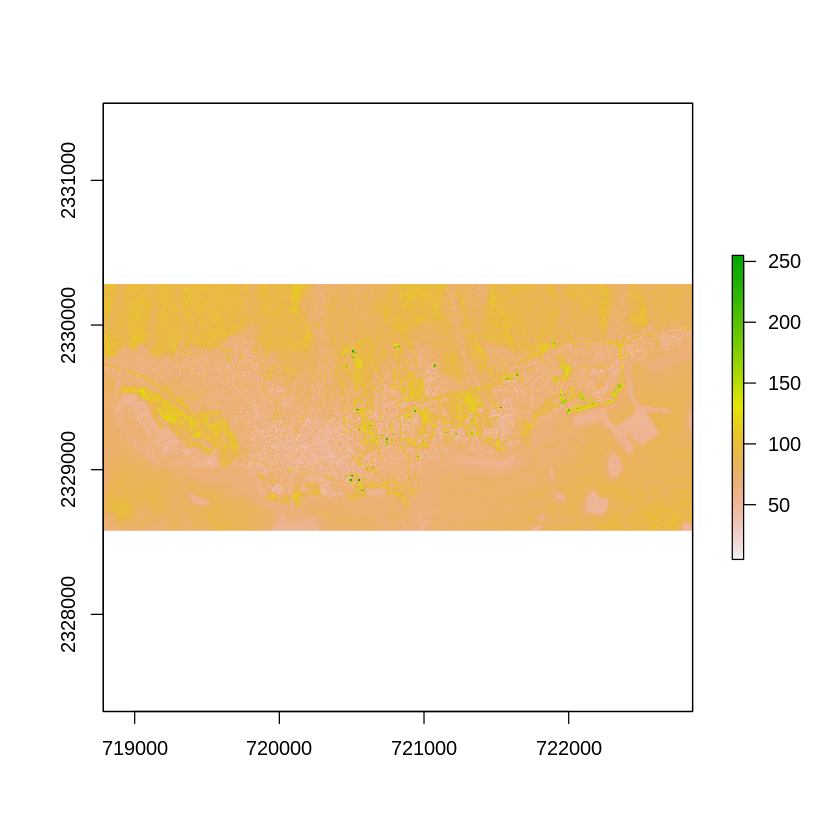

In [103]:
naip <- stack ('/content/kamalo2017/01.tif')
naip [[1]]%>% plot

redo the ones where I forgot to include 03

In [104]:
# planet_raster <-stack(
#   '/content/kahuku2022/01.tif',
# '/content/kahuku2022/02.tif',
# '/content/kahuku2022/03.tif',
# '/content/kahuku2022/04.tif',
# '/content/kahuku2022/05.tif',
# '/content/kahuku2022/06.tif',
# '/content/kahuku2022/07.tif')

In [105]:
ccap_raster <- stack('/content/kamalo2017/kamalo2017_ccap.tif')

In [106]:
naip_raster_extended <- extend(naip, projectExtent(ccap_raster, naip), value=NA)

In [107]:
ccap_raster
naip

class      : RasterStack 
dimensions : 710, 1696, 1204160, 1  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 718785.6, 722856, 2328577, 2330281  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : Layer_1 


class      : RasterStack 
dimensions : 4264, 10183, 43420312, 3  (nrow, ncol, ncell, nlayers)
resolution : 0.4, 0.4  (x, y)
extent     : 718783.2, 722856.4, 2328578, 2330284  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : X01_1, X01_2, X01_3 


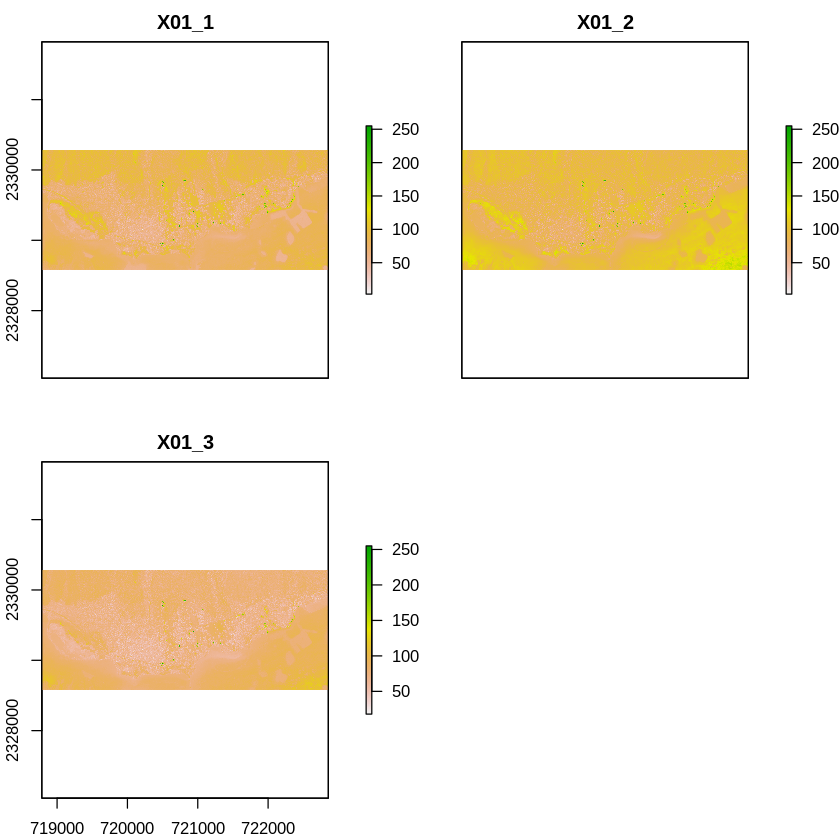

In [108]:
naip %>% plot
# planet_raster %>% plot

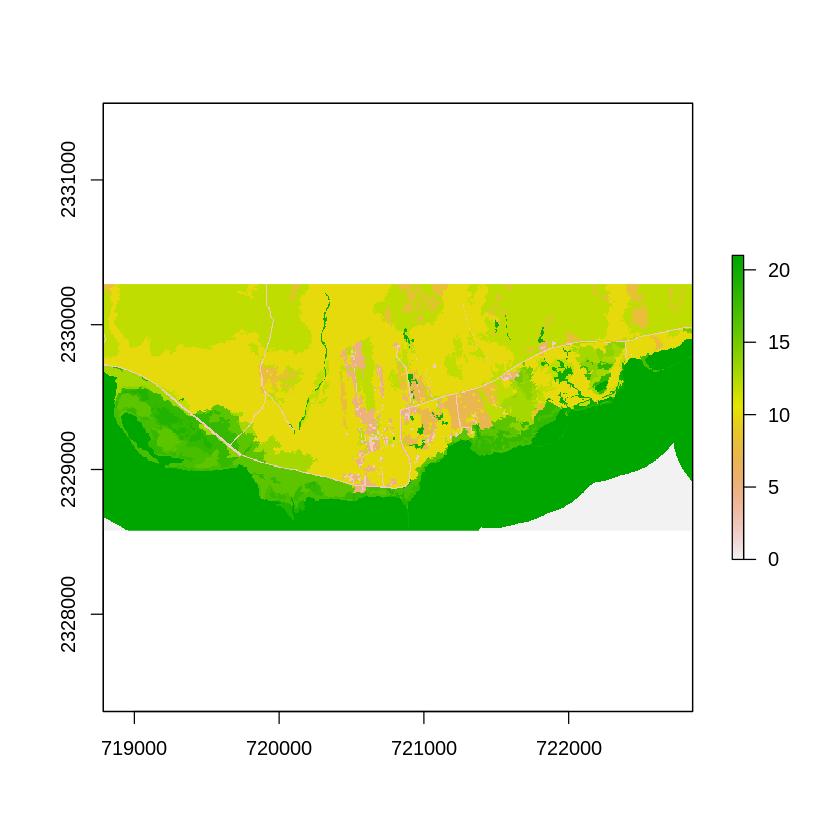

In [109]:
ccap_raster %>% plot

In [110]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

[1] 1696

[1] 710

In [111]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/kamalo2017/Images"
new_folder_path2 <- "/content/kamalo2017/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/kamalo2017/Images 
Folder created: /content/kamalo2017/Labels 


In [112]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(naip_raster_extended, projectExtent(ccap_cropped_raster,naip))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/kamalo2017/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/kamalo2017/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/kamalo2017/kamalo2017.csv")


class      : RasterBrick 
dimensions : 512, 512, 262144, 3  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 718785.6, 720014.4, 2329052, 2330281  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :     X01_1,     X01_2,     X01_3 
min values :  5.148304,  0.647852, 23.045127 
max values :  160.0013,  159.6595,  145.8493 

class      : RasterBrick 
dimensions : 512, 512, 262144, 3  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 720016.8, 721245.6, 2329050, 2330278  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :     X01_1,     X01_2,     X01_3 
min values :  2.687635,  2.932135, 13.972162 
max values :       255,       255,       255 

class      : RasterBrick 
dimensions : 512, 512, 262144, 3  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 721243.2, 722472, 2329050, 2330278

In [113]:
zip(zipfile = "/content/kamalo2017.zip",
    files = c("/content/kamalo2017/Images",
              "/content/kamalo2017/Labels",
              "/content/kamalo2017/kamalo2017.csv"))

Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”


In [114]:
# save to processed_data https://drive.google.com/drive/folders/1LNPpbEw86VQ-UV545ihcNuvYMvb7H61X?usp=drive_link
drive_upload(media = "/content/kamalo2017.zip", path = as_id("1LNPpbEw86VQ-UV545ihcNuvYMvb7H61X"))

Local file:

• /content/kamalo2017.zip

Uploaded into Drive file:

• kamalo2017.zip <id: 1m07h933nJzHNR67-p8QP3h8tAFcdxUtL>

With MIME type:

• application/zip

